<img src="images/cads-logo.png" style="height: 100px;" align=left> 
<img src="images/eds.png" style="height: 100px;" align=right> 

# EDS Capstone

## Submission Guideline

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Preprocessing - Integrity Check, Exploratory Data Analysis, Cleaning
    2. **Feature Engineering**: Make new features or change the current features
    3. **Feature Selection**: Choose the best features
    4. **Predictive Models**: Create several predictive models and tune the hyperparameters
    5. **Model Evaluation**: Compare the performance of the models
    6. **Choose the Best Model**: Choose the model that has the best performance

The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.


All submissions are to be emailed to the trainer email address **by 3:00 pm of the last day**, indicating the names of all group members and your team name in your email.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
#### Design a predictive model to determine the potential customers. The target variable is `Potential_Customer`. 

You have been provided with information such as customers spending for last sevral years, the amount of money spent, Number of inactive months and so on.

## Data Description
- Below is the description of each feature available in the dataset

<img src="images/MicrosoftTeams-image.png" style="height: 700px">

# 1. Import necessary Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

# import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# model evaluation 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Load the Data into Pandas Dataframe

In [2]:
data = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)
data.head(10)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,$7.50,14,110,32,48,73,3,12,16,A,0,71.00,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.00,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,$14.67,19,57,14,35,53,6,17,22,S,1,79.00,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.00,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,$4.00,17,118,13,28,63,6,12,24,S,1,68.00,F,H,"$113,663.00"
5,1,88119,$10.00,4,15,4,12,$10.00,$7.75,$7.00,$7.75,16,120,14,34,72,6,16,33,A,1,67.00,F,H,"$62,230.00"
6,0,88113,NaN,3,12,3,8,$18.00,$18.00,$14.58,$18.00,24,111,11,32,63,6,17,27,A,1,78.00,M,H,"$62,230.00"
7,0,88092,NaN,1,3,1,3,$20.00,$20.00,$18.33,$20.00,20,58,10,23,36,4,10,14,A,0,48.00,M,H,"$62,230.00"
8,1,88153,$13.00,4,16,3,9,$5.00,$7.75,$8.06,$7.00,24,122,6,26,60,3,14,27,S,1,49.00,F,H,"$56,828.00"
9,0,88151,NaN,4,14,4,14,$16.00,$14.50,$11.57,$14.50,16,104,14,34,72,6,16,30,S,1,63.00,M,H,"$56,828.00"


# 3. Data Integrity Check

Data Cleaning (Checking the existance of missing values, the type of variables, or integrity of data) should be done on the whole data. But EDA (checking the relationship of variables, summary of data, outliers, filling missing values etc.) should be done only on train set because we assume our analysis never sees the test set. However, if for instance we decide to fill missing values in one variable with specific number as the result of EDA on train set, then all missing values in both train and test will be filled with than value.

**Attention:**
> Be careful about information leakage from test set!

## 3.1. How big is the data? (number of rows, features and their types)

In [3]:
# checking the shape of dataframe
data.shape

(4469, 25)

In [4]:
# check the info of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 3.1.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?
#### 3.1.1.1 Remove the dollar sign and comma from data

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')` 

**Example:** `data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')`

In [5]:
# standardizing the column names to lowercase
data.columns = data.columns.str.lower()
data.columns

# visualize column names
data.columns

Index(['potential_customer', 'c_id', 'cust_last_purchase', 'pur_3_years',
       'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect',
       'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg',
       'pur_3_years_avg_indirect', 'inact_last', 'inact_first',
       'ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year',
       'ad_res_ind_3_year', 'ad_res_ind_5_year', 'status_cust',
       'status_latest_ad', 'age', 'gender', 'cust_prop', 'cust_ann_income'],
      dtype='object')

In [6]:
for col in ['cust_last_purchase','pur_latest', 'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect', 'cust_ann_income']:
    data[col] = data[col].str.replace('$', '')
    data[col] = data[col].str.replace(',', '')

data.head()

,potential_customer,c_id,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.00,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.00,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.00,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.00,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.00,F,H,113663.00


In [7]:
# change relevent data type from object to float
for col in ['cust_last_purchase', 'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect', 'cust_ann_income']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
# recheck the summary of the data frame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   potential_customer        4469 non-null   int64  
 1   c_id                      4469 non-null   int64  
 2   cust_last_purchase        2149 non-null   float64
 3   pur_3_years               4469 non-null   int64  
 4   pur_5_years               4469 non-null   int64  
 5   pur_3_years_indirect      4469 non-null   int64  
 6   pur_5_years_indirect      4469 non-null   int64  
 7   pur_latest                4469 non-null   float64
 8   pur_3_years_avg           4469 non-null   float64
 9   pur_5_years_avg           4469 non-null   float64
 10  pur_3_years_avg_indirect  3642 non-null   float64
 11  inact_last                4469 non-null   int64  
 12  inact_first               4469 non-null   int64  
 13  ad_res_1_year             4469 non-null   int64  
 14  ad_res_3

## 3.2. Check data for duplicate rows

In [8]:
# checking for duplicated entries
def check_duplicate(d,c):
    if len(d[c])>len(set(d[c])):
        print('Data has duplicates')
    else:
        print('Data does not have duplicate')

check_duplicate(data, 'c_id')

Data has duplicates


In [9]:
# check for duplicate entries detail
data[data.duplicated()].sum()

potential_customer                                                        413
c_id                                                                 76170844
cust_last_purchase                                                    6221.00
pur_3_years                                                              2764
pur_5_years                                                              9320
pur_3_years_indirect                                                     1573
pur_5_years_indirect                                                     4922
pur_latest                                                           13206.00
pur_3_years_avg                                                      12774.79
pur_5_years_avg                                                      10745.82
pur_3_years_avg_indirect                                              9618.92
inact_last                                                              15215
inact_first                                                     

### 3.2.1 Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [10]:
# remove duplicate entries from the data frame
data = data.drop_duplicates()

# recheck the summary of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   potential_customer        3618 non-null   int64  
 1   c_id                      3618 non-null   int64  
 2   cust_last_purchase        1736 non-null   float64
 3   pur_3_years               3618 non-null   int64  
 4   pur_5_years               3618 non-null   int64  
 5   pur_3_years_indirect      3618 non-null   int64  
 6   pur_5_years_indirect      3618 non-null   int64  
 7   pur_latest                3618 non-null   float64
 8   pur_3_years_avg           3618 non-null   float64
 9   pur_5_years_avg           3618 non-null   float64
 10  pur_3_years_avg_indirect  2956 non-null   float64
 11  inact_last                3618 non-null   int64  
 12  inact_first               3618 non-null   int64  
 13  ad_res_1_year             3618 non-null   int64  
 14  ad_res_3

## 3.3. Do we need `C_ID` in our analysis?


In [11]:
# dropping the c_id column
data.drop(["c_id"], axis=1, inplace=True)

In [12]:
# recheck column names
data.columns

# 'c_id' column has been removed

Index(['potential_customer', 'cust_last_purchase', 'pur_3_years',
       'pur_5_years', 'pur_3_years_indirect', 'pur_5_years_indirect',
       'pur_latest', 'pur_3_years_avg', 'pur_5_years_avg',
       'pur_3_years_avg_indirect', 'inact_last', 'inact_first',
       'ad_res_1_year', 'ad_res_3_year', 'ad_res_5_year', 'ad_res_ind_1_year',
       'ad_res_ind_3_year', 'ad_res_ind_5_year', 'status_cust',
       'status_latest_ad', 'age', 'gender', 'cust_prop', 'cust_ann_income'],
      dtype='object')

## 3.4. Check if the column types are accurate? if not fix them

In [13]:
# defining the columns by type
CatCols = ['potential_customer', 'status_cust', 'status_latest_ad', 'gender', 'cust_prop']
NumCols = list(set(data.columns)-set(CatCols))

# changing the column types
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [14]:
# recheck numerical variable column names
data[NumCols].columns

Index(['pur_5_years_indirect', 'age', 'pur_3_years_indirect',
       'pur_3_years_avg_indirect', 'pur_3_years', 'cust_last_purchase',
       'ad_res_1_year', 'pur_5_years_avg', 'inact_last', 'ad_res_ind_5_year',
       'pur_latest', 'pur_3_years_avg', 'pur_5_years', 'ad_res_5_year',
       'ad_res_ind_3_year', 'inact_first', 'ad_res_ind_1_year',
       'cust_ann_income', 'ad_res_3_year'],
      dtype='object')

# 4. Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [15]:
# select independent variables
X = data.drop(columns='potential_customer')

# select dependent variables
y = data.loc[:, 'potential_customer'] 

# prove that the variables were selected correctly
print(X.columns, '\n')

# prove that the variables were selected correctly
print(y.name)

Index(['cust_last_purchase', 'pur_3_years', 'pur_5_years',
       'pur_3_years_indirect', 'pur_5_years_indirect', 'pur_latest',
       'pur_3_years_avg', 'pur_5_years_avg', 'pur_3_years_avg_indirect',
       'inact_last', 'inact_first', 'ad_res_1_year', 'ad_res_3_year',
       'ad_res_5_year', 'ad_res_ind_1_year', 'ad_res_ind_3_year',
       'ad_res_ind_5_year', 'status_cust', 'status_latest_ad', 'age', 'gender',
       'cust_prop', 'cust_ann_income'],
      dtype='object') 

potential_customer


In [16]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 5. Exploratory Data Analysis (EDA)

## 5.1. Explore Categorical Variables

In [17]:
CatCols = ['status_cust', 'status_latest_ad', 'gender', 'cust_prop']

# returns counts of unique values for each categorical columns
for catcols in CatCols:
    print('Column: {} \nUnique Values:\n{} \nCount Values:\n{} \n\n-----------------------------------\n'.format(catcols, X_train[catcols].unique(), X_train[catcols].value_counts()))

Column: status_cust 
Unique Values:
['S', 'A', 'N', 'F', 'E', 'L']
Categories (6, object): ['S', 'A', 'N', 'F', 'E', 'L'] 
Count Values:
A    1635
S     708
F     172
N     141
E      49
L       8
Name: status_cust, dtype: int64 

-----------------------------------

Column: status_latest_ad 
Unique Values:
[1, 0]
Categories (2, int64): [1, 0] 
Count Values:
1    1528
0    1185
Name: status_latest_ad, dtype: int64 

-----------------------------------

Column: gender 
Unique Values:
['F', 'M', 'U']
Categories (3, object): ['F', 'M', 'U'] 
Count Values:
F    1462
M    1138
U     113
Name: gender, dtype: int64 

-----------------------------------

Column: cust_prop 
Unique Values:
['U', 'H']
Categories (2, object): ['U', 'H'] 
Count Values:
H    1503
U    1210
Name: cust_prop, dtype: int64 

-----------------------------------



In [18]:
# # import necessary packages
# import seaborn as sns
# sns.set()

# import matplotlib.pyplot as plt
# %matplotlib inline

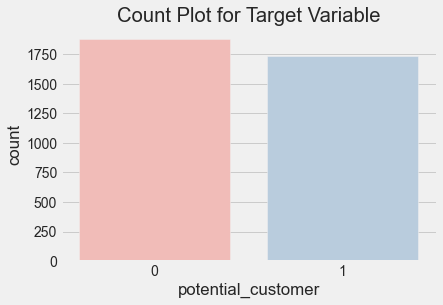

In [19]:
# visualize count plot for response variable
sns.countplot(data=data, x='potential_customer', palette='Pastel1')
plt.title('Count Plot for Target Variable');

In [20]:
# visualizing the categorical columns
# CatCols = ['status_cust', 'status_latest_ad', 'gender', 'cust_prop']
# for i,x in enumerate(X_train[CatCols]):
#     plt.figure(i)
#     ax = sns.countplot(data=X_train, x=x, palette='Pastel2')

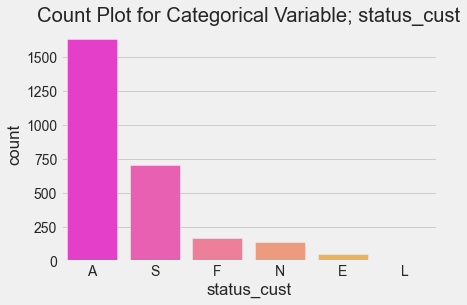

In [21]:
# visualize count plot for status_cust
sns.countplot(data=X_train, x='status_cust', palette='spring', order = X_train['status_cust'].value_counts().index)
plt.title('Count Plot for Categorical Variable; status_cust');

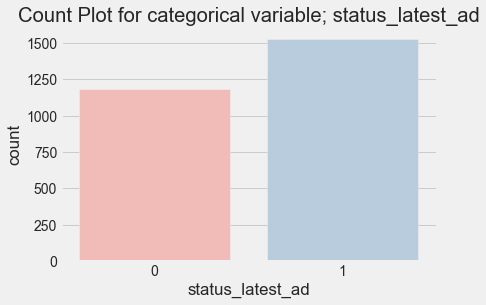

In [22]:
# visualize count plot for status_latest_ad
sns.countplot(data=X_train, x='status_latest_ad', palette='Pastel1')
plt.title('Count Plot for categorical variable; status_latest_ad');

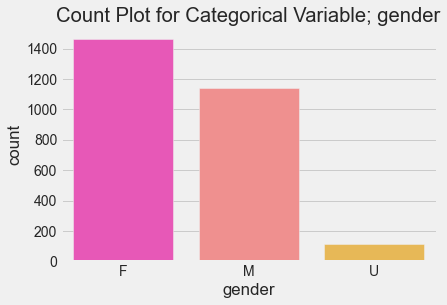

In [23]:
# visualize count plot for gender
sns.countplot(data=X_train, x='gender', palette= 'spring')
plt.title('Count Plot for Categorical Variable; gender');

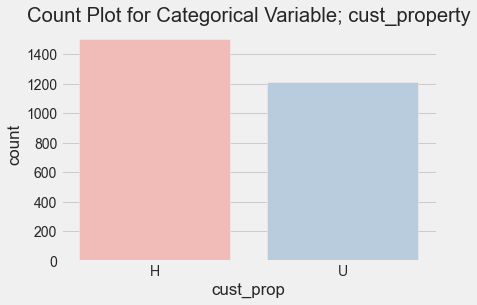

In [24]:
# visualize count plot for cust_prop
sns.countplot(data=X_train, x='cust_prop', palette='Pastel1')
plt.title('Count Plot for Categorical Variable; cust_property');

## 5.2. Explore Relationship Between Categorical & Target Variable

In [25]:
# joining the train sets
data_train = X_train.join(y_train)

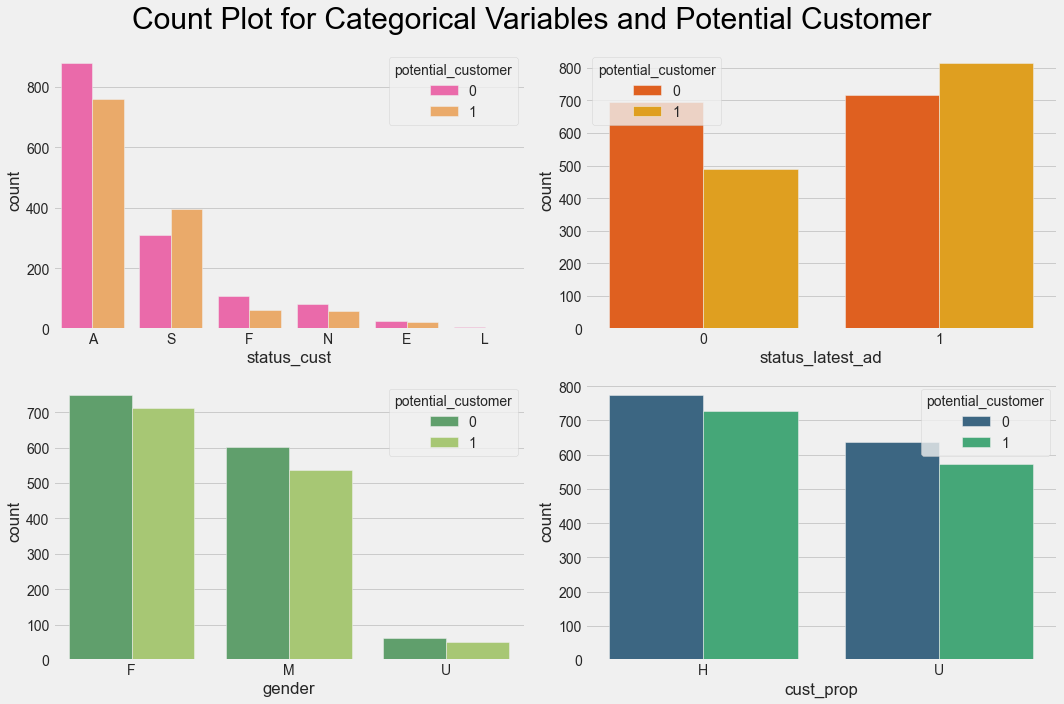

In [26]:
# create figures to explore relationship between categorical and target variable
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plt.suptitle('Count Plot for Categorical Variables and Potential Customer', fontsize=30, color='black')

ax1 = sns.countplot(x='status_cust', data=data_train, hue='potential_customer', ax=ax[0,0], palette='spring', order= data_train['status_cust'].value_counts().index)
ax1.set(xlabel='status_cust')

ax2 = sns.countplot(x='status_latest_ad', data=data_train, hue='potential_customer', ax=ax[0,1], palette='autumn')
ax2.set(xlabel='status_latest_ad')

ax3 = sns.countplot(x='gender', data=data_train, hue='potential_customer', ax=ax[1,0], palette='summer')
ax3.set(xlabel='gender')

ax4 = sns.countplot(x='cust_prop', data=data_train, hue='potential_customer', ax=ax[1,1], palette='viridis')
ax4.set(xlabel='cust_prop')

plt.tight_layout()
plt.show()

### 5.2.1 Insight

<div class="alert alert-block alert-info">
As depicted in the count plots above, we can extract the following inferences: <br> 

▶ [Top-left] Active buyers ('A') and star buyers ('S') are more likely to be potential customers ('1'). Further distinctions should be explored between these type of buyers to understand their shopping behaviours and cater marketing strategies towards them.

▶[Top-right] Customers that purchased in response to the latest promotional sale ('1') are more likely to be potential customers than those who don't ('0'). Although, the company is already gaining a relatively good amount of customers from not a direct result of the promotional sale. Effectiveness of promotional sale should be further explored.

▶[Bottom-right] Female (`F`) and male (`M`) have the same count plot trend; the number of potential customers that remain is shown to be lower (`1`) as compared to those who leave (`0`).

▶[Bottom-left] Customers who own a property (`H`) may be potential customers but a bigger proportion of them are more likely to only make a purchase/s and not stay. However, a big proportion of this column shown to be 'unknown'('U'), it would be hard to compare these to categories and reach a reliable conclusion whether owning a property would have a high predicting power.
</div>

### 5.2.2 Solution

<div class="alert alert-block alert-info">
Based on the inferences above, we can conclude the following:<br>

▶ The company can continue with the promotional sale more often to generate more active and star buyers, as well as catering marketing campaigns for these customer segment.

▶ Owning a property seems to not have a strong predictive power for a customer to stay, thus the column will be dropped later during feature selection.

▶ The 'unknown' data from the 'gender' column will have to be replaced with the mode later on.
</div>

## 5.3. Explore Numerical Variables

In [27]:
# fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
# NumCols = list(set(X_train.columns)-set(CatCols))
# for i in enumerate(X_train[NumCols]):
#     sns.histplot(X_train[NumCols[i]], ax=ax[a,0])
#     sns.boxplot(X_train[NumCols[i]], ax=ax[a,1])


In [28]:
data_train.describe()

,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,age,cust_ann_income
count,1302.00,2713.00,2713.00,2713.00,2713.00,2713.00,2713.00,2713.00,2193.00,2713.00,2713.00,2713.00,2713.00,2713.00,2713.00,2713.00,2713.00,2128.00,2713.00
mean,14.69,3.32,11.04,1.91,5.87,15.34,14.45,12.03,13.66,17.92,73.67,13.10,29.76,49.71,5.44,12.07,19.55,58.41,42138.35
std,11.67,2.21,9.41,1.64,4.89,11.19,10.50,8.34,10.07,4.22,38.00,5.02,7.81,22.92,1.39,4.64,8.54,17.06,25737.42
min,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.50,1.75,4.00,15.00,3.00,5.00,7.00,1.00,2.00,3.00,0.00,0.00
25%,9.00,2.00,4.00,1.00,2.00,10.00,9.21,7.50,8.00,16.00,40.00,11.00,26.00,31.00,5.00,7.00,13.00,46.00,32547.00
50%,11.50,3.00,9.00,2.00,5.00,15.00,13.00,10.33,11.88,18.00,74.00,12.00,31.00,51.00,6.00,13.00,20.00,59.00,44756.00
75%,20.00,4.00,15.00,3.00,8.00,20.00,17.50,15.00,16.80,20.00,111.00,14.00,34.00,66.00,6.00,16.00,27.00,73.00,56828.00
max,200.00,15.00,82.00,9.00,29.00,250.00,260.00,200.00,260.00,27.00,260.00,49.00,71.00,147.00,17.00,28.00,51.00,87.00,165543.00


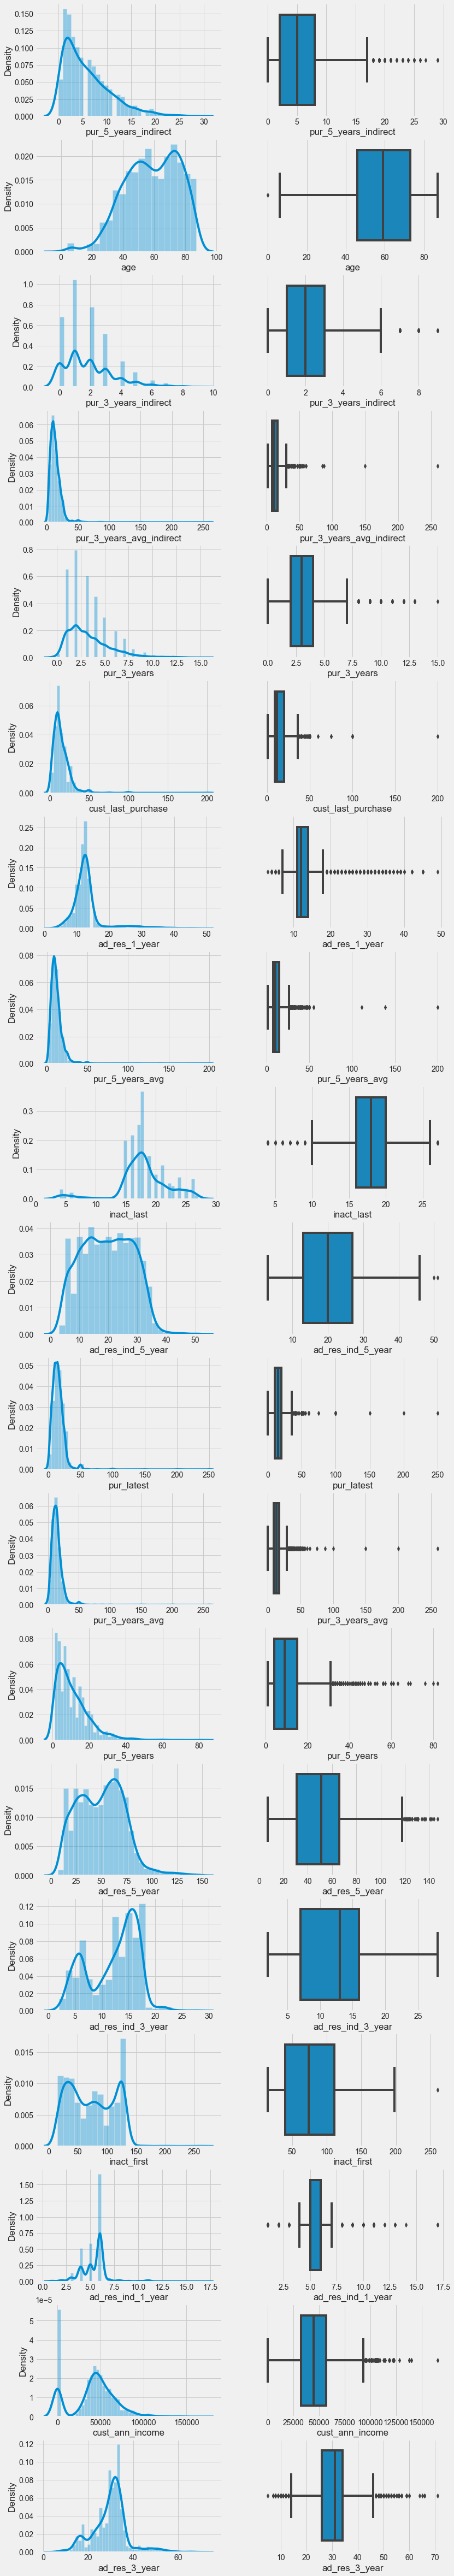

In [29]:
NumCols = list(set(X_train.columns)-set(CatCols))

fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for a in range(len(NumCols)):
    sns.distplot(X_train[NumCols[a]],ax=ax[a,0])
    sns.boxplot(X_train[NumCols[a]],ax=ax[a,1]);

    # CatCols = ['status_cust', 'status_latest_ad', 'gender', 'cust_prop']
# for i,x in enumerate(X_train[CatCols]):
#     plt.figure(i)
#     ax = sns.countplot(data=X_train, x=x, palette='Pastel2')

In [30]:
from scipy.stats import skew
X_train.skew()

cust_last_purchase          5.33
pur_3_years                 1.33
pur_5_years                 1.97
pur_3_years_indirect        1.13
pur_5_years_indirect        1.25
pur_latest                  7.28
pur_3_years_avg             8.67
pur_5_years_avg             7.27
pur_3_years_avg_indirect    8.95
inact_last                 -0.83
inact_first                 0.14
ad_res_1_year               2.76
ad_res_3_year               0.35
ad_res_5_year               0.41
ad_res_ind_1_year           1.12
ad_res_ind_3_year          -0.43
ad_res_ind_5_year           0.06
age                        -0.37
cust_ann_income            -0.05
dtype: float64

### 5.3.1 Insight

▶ Most of the numerical columns of the data shows some degree of skewness. In which will have to be dealt with before proceeding with model creation.

▶ We also notice a few features that contain outliers which will have to look out for.

### 5.3.2 Handling Missing Values

In [31]:
# checking for missing values
data_train.isnull().sum()

cust_last_purchase          1411
pur_3_years                    0
pur_5_years                    0
pur_3_years_indirect           0
pur_5_years_indirect           0
pur_latest                     0
pur_3_years_avg                0
pur_5_years_avg                0
pur_3_years_avg_indirect     520
inact_last                     0
inact_first                    0
ad_res_1_year                  0
ad_res_3_year                  0
ad_res_5_year                  0
ad_res_ind_1_year              0
ad_res_ind_3_year              0
ad_res_ind_5_year              0
status_cust                    0
status_latest_ad               0
age                          585
gender                         0
cust_prop                      0
cust_ann_income                0
potential_customer             0
dtype: int64

#### 5.3.2.1 Cust_Last_Purchase

In [32]:
# fillna using median
median_clp = data_train['cust_last_purchase'].median()
data_train['cust_last_purchase'] = data_train['cust_last_purchase'].fillna(median_clp)

##### 5.3.2.2 Pur_3_years_Avg_Indirect

In [33]:
# fillna with median
median_pur_3y_avg_ind = data_train.pur_3_years_avg_indirect.median()
data_train.pur_3_years_avg_indirect = data_train.pur_3_years_avg_indirect.fillna(median_pur_3y_avg_ind)

#### 5.3.2.3. Age 

In [34]:
# fillna using median
median_age = data_train['age'].median()
data_train['age'] = data_train['age'].fillna(median_age)

#### 5.3.2.4. Cust_Ann_Income 

In [35]:
# check the sum of missing values in the data frame
data_train.isna().sum()

# Observe that there is no missing values in 'cust_ann_income' column

cust_last_purchase          0
pur_3_years                 0
pur_5_years                 0
pur_3_years_indirect        0
pur_5_years_indirect        0
pur_latest                  0
pur_3_years_avg             0
pur_5_years_avg             0
pur_3_years_avg_indirect    0
inact_last                  0
inact_first                 0
ad_res_1_year               0
ad_res_3_year               0
ad_res_5_year               0
ad_res_ind_1_year           0
ad_res_ind_3_year           0
ad_res_ind_5_year           0
status_cust                 0
status_latest_ad            0
age                         0
gender                      0
cust_prop                   0
cust_ann_income             0
potential_customer          0
dtype: int64

In [36]:
#(explore ways to deal with outliers in the future)

# 6. Feature Engineering: 


## 6.1. Add Some High Level Features

In [37]:
# total no of purchase = combine offline and online(indirect)
X_train['total_purchase'] = X_train.pur_5_years + X_train.pur_5_years_indirect

# period of activity = first inactive - last inactive
X_train['period_of_active'] = X_train.inact_first - X_train.inact_last

# total purchase coming from ads = combine ads
X_train['total_ads_res'] = X_train.ad_res_5_year + X_train.ad_res_ind_5_year

# update new columns created as numerical columns 
new_col = ['total_purchase', 'period_of_active', 'total_ads_res']
for i in new_col:
  NumCols.append(i)
  
X_train.head()

,cust_last_purchase,pur_3_years,pur_5_years,pur_3_years_indirect,pur_5_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,inact_last,inact_first,ad_res_1_year,ad_res_3_year,ad_res_5_year,ad_res_ind_1_year,ad_res_ind_3_year,ad_res_ind_5_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income,total_purchase,period_of_active,total_ads_res
3151,5.00,4.00,29.00,2.00,9.00,6.00,7.50,5.45,7.00,4.00,75.00,29.00,44.00,86.00,7.00,15.00,22.00,S,1,86.00,F,U,55681.00,38.00,71.00,108.00
1698,16.00,5.00,22.00,4.00,13.00,8.00,8.60,6.82,8.50,9.00,91.00,27.00,41.00,62.00,11.00,18.00,27.00,S,1,63.00,F,H,39313.00,35.00,82.00,89.00
2327,15.00,5.00,8.00,2.00,3.00,10.00,9.60,8.00,10.50,17.00,44.00,13.00,32.00,37.00,6.00,16.00,16.00,A,0,44.00,M,H,64119.00,11.00,27.00,53.00
721,2.00,6.00,7.00,3.00,3.00,5.00,2.67,2.57,3.00,17.00,30.00,13.00,26.00,24.00,6.00,12.00,10.00,A,1,40.00,F,H,49122.00,10.00,13.00,34.00
811,16.00,3.00,15.00,2.00,9.00,10.00,11.33,9.60,12.00,18.00,130.00,13.00,31.00,69.00,6.00,14.00,30.00,S,1,71.00,M,H,47917.00,24.00,112.00,99.00


In [38]:
# drop unused columns
X_train.drop(['pur_5_years','pur_5_years_indirect','inact_first','inact_last','ad_res_5_year','ad_res_ind_5_year'], axis=1, inplace=True)

X_train.head()

,cust_last_purchase,pur_3_years,pur_3_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,pur_3_years_avg_indirect,ad_res_1_year,ad_res_3_year,ad_res_ind_1_year,ad_res_ind_3_year,status_cust,status_latest_ad,age,gender,cust_prop,cust_ann_income,total_purchase,period_of_active,total_ads_res
3151,5.00,4.00,2.00,6.00,7.50,5.45,7.00,29.00,44.00,7.00,15.00,S,1,86.00,F,U,55681.00,38.00,71.00,108.00
1698,16.00,5.00,4.00,8.00,8.60,6.82,8.50,27.00,41.00,11.00,18.00,S,1,63.00,F,H,39313.00,35.00,82.00,89.00
2327,15.00,5.00,2.00,10.00,9.60,8.00,10.50,13.00,32.00,6.00,16.00,A,0,44.00,M,H,64119.00,11.00,27.00,53.00
721,2.00,6.00,3.00,5.00,2.67,2.57,3.00,13.00,26.00,6.00,12.00,A,1,40.00,F,H,49122.00,10.00,13.00,34.00
811,16.00,3.00,2.00,10.00,11.33,9.60,12.00,13.00,31.00,6.00,14.00,S,1,71.00,M,H,47917.00,24.00,112.00,99.00


In [39]:
# joined data set
data_train = X_train.join(y_train)

## 6.2. Explore Relationship Between Numerical variables & Target Variable

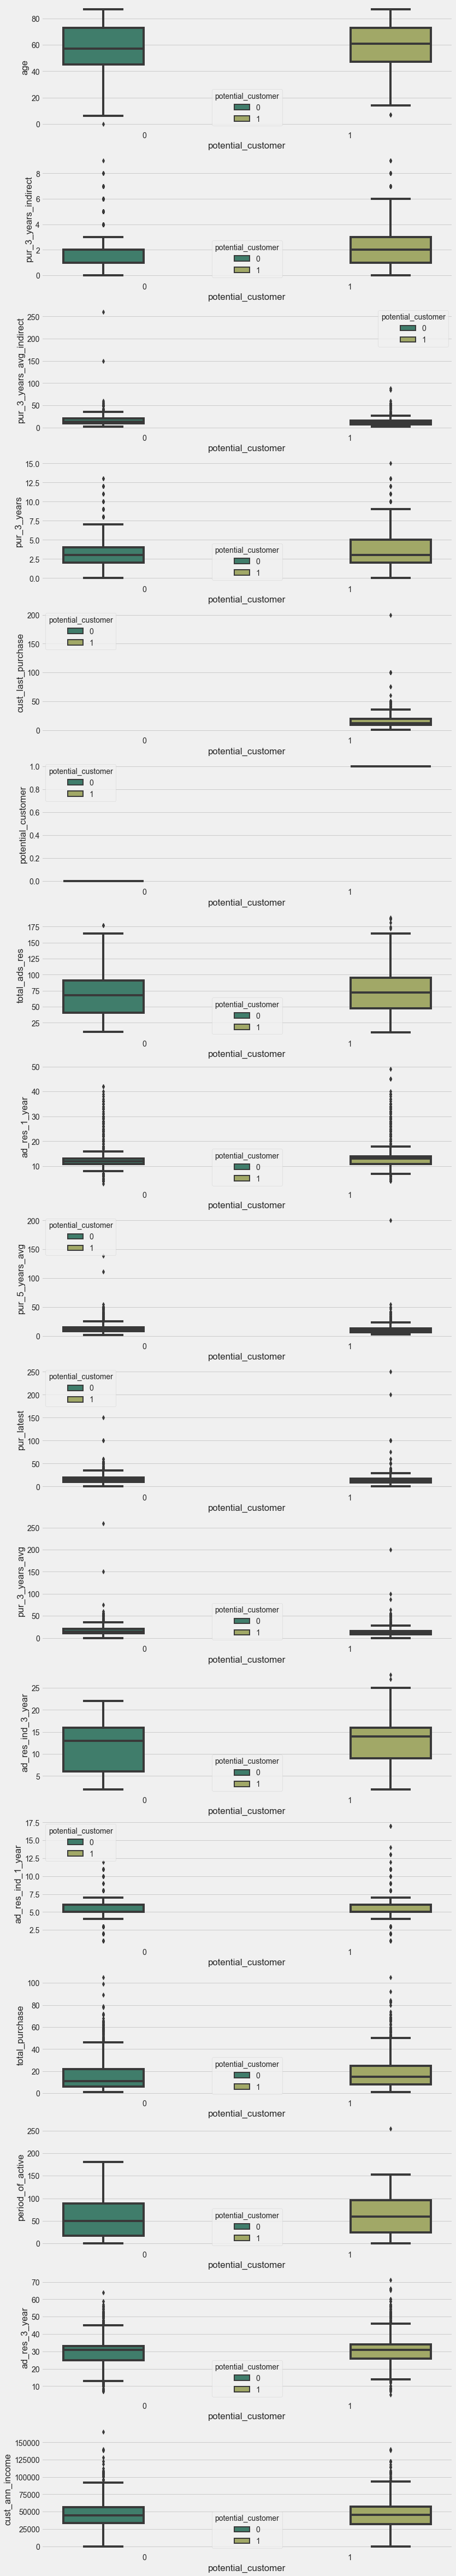

In [40]:
NumCols = list(set(data_train.columns)-set(CatCols))
#creating the visualisations
fig, ax=plt.subplots(nrows=len(NumCols), figsize=(12,80))
for a in np.arange(len(NumCols)): 
    sns.boxplot(x=data_train.potential_customer, y=data_train[NumCols[a]], hue=data_train.potential_customer, ax=ax[a], palette='gist_earth');

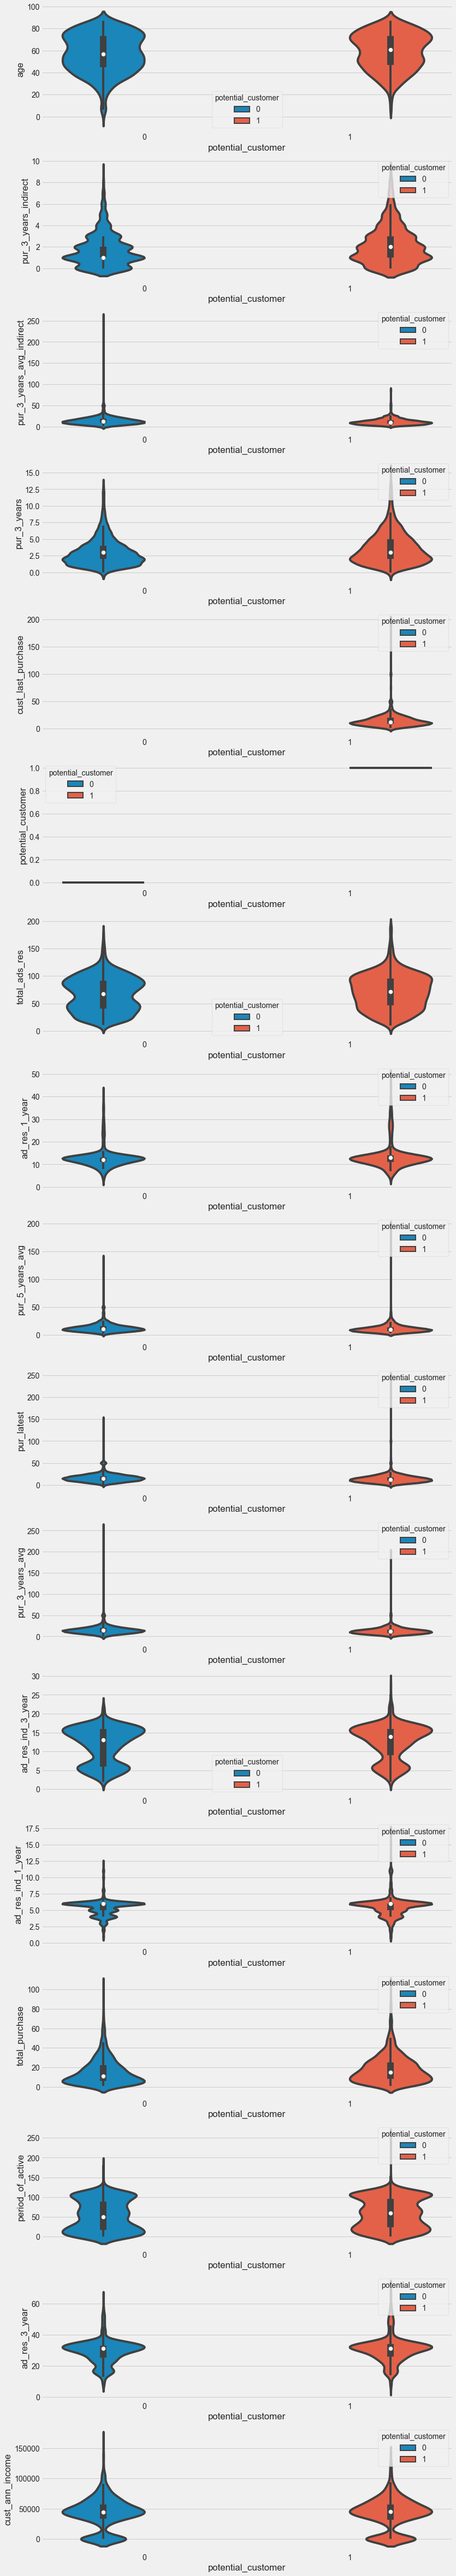

In [41]:
# violin plots

fig, ax=plt.subplots(nrows=len(NumCols), figsize=(12,80))
for a in np.arange(len(NumCols)): 
    sns.violinplot(x=data_train.potential_customer, y=data_train[NumCols[a]], hue=data_train.potential_customer, ax=ax[a]);

## 6.3. Explore Correlation between Numerical Variables

In [42]:
# define catcols and numcols
catcols = ['potential_customer', 'status_cust', 'status_latest_ad', 'gender', 'cust_prop']
numcols = list(set(data_train.columns) - set(catcols))

# find correlation between numerical variables
data_train[numcols].corr().style.background_gradient(cmap="YlOrBr")

,age,pur_3_years_indirect,pur_3_years_avg,pur_latest,pur_3_years_avg_indirect,pur_3_years,ad_res_ind_3_year,cust_last_purchase,ad_res_ind_1_year,total_purchase,period_of_active,total_ads_res,ad_res_1_year,pur_5_years_avg,ad_res_3_year,cust_ann_income
age,1.000000,0.032305,-0.037123,-0.030891,-0.027013,0.049715,0.070158,-0.042670,0.067305,0.174296,0.229677,0.207199,0.104708,-0.078192,0.106624,-0.032594
pur_3_years_indirect,0.032305,1.000000,-0.285037,-0.288438,-0.289548,0.845839,0.650644,-0.267353,0.291300,0.523490,0.149990,0.248734,0.179813,-0.285062,0.282377,-0.029886
pur_3_years_avg,-0.037123,-0.285037,1.000000,0.762418,0.977846,-0.345496,-0.117492,0.713066,0.009359,-0.250551,-0.132320,-0.080746,0.090019,0.886758,0.030852,0.046454
pur_latest,-0.030891,-0.288438,0.762418,1.000000,0.712001,-0.342173,-0.138199,0.779469,-0.016093,-0.258901,-0.152661,-0.111838,0.028843,0.727225,-0.027376,0.071217
pur_3_years_avg_indirect,-0.027013,-0.289548,0.977846,0.712001,1.000000,-0.364972,-0.050976,0.741782,0.001443,-0.241303,-0.129396,-0.077032,0.095028,0.878633,0.016461,0.048843
pur_3_years,0.049715,0.845839,-0.345496,-0.342173,-0.364972,1.000000,0.597192,-0.320649,0.357535,0.567209,0.215145,0.321100,0.214030,-0.359505,0.389419,-0.059264
ad_res_ind_3_year,0.070158,0.650644,-0.117492,-0.138199,-0.050976,0.597192,1.000000,-0.141422,0.612616,0.448139,0.266487,0.461195,0.368133,-0.176181,0.619175,0.018413
cust_last_purchase,-0.042670,-0.267353,0.713066,0.779469,0.741782,-0.320649,-0.141422,1.000000,-0.017494,-0.224718,-0.149745,-0.092330,0.049076,0.602962,-0.000572,0.039841
ad_res_ind_1_year,0.067305,0.291300,0.009359,-0.016093,0.001443,0.357535,0.612616,-0.017494,1.000000,0.232273,0.157398,0.417059,0.672122,-0.026304,0.715931,0.034374
total_purchase,0.174296,0.523490,-0.250551,-0.258901,-0.241303,0.567209,0.448139,-0.224718,0.232273,1.000000,0.750065,0.800069,0.283276,-0.348510,0.443509,-0.030204


# 7. Feature Selection

In [43]:
col=list(data_train.select_dtypes(include=['int64','float64']).columns)

In [44]:
from scipy import stats

for i in col:
    x = np.array(data_train[data_train.potential_customer == 0][i]) 
    y = np.array(data_train[data_train.potential_customer == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of potential and non-potential customer are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of potential and non-potential customer are  same'.format('\033[1m',i))
    print('\n')

 P_Value:nan
 Fail to Reject Null Hypothesis.cust_last_purchase of potential and non-potential customer are  same


 P_Value:2.5010439456167696e-13
 Rejecting Null Hypothesis.pur_3_years of potential and non-potential customer are not same


 P_Value:1.1504264101684928e-11
 Rejecting Null Hypothesis.pur_3_years_indirect of potential and non-potential customer are not same


 P_Value:5.111564296111497e-07
 Rejecting Null Hypothesis.pur_latest of potential and non-potential customer are not same


 P_Value:2.2170785503144143e-07
 Rejecting Null Hypothesis.pur_3_years_avg of potential and non-potential customer are not same


 P_Value:6.840180740406072e-08
 Rejecting Null Hypothesis.pur_5_years_avg of potential and non-potential customer are not same


 P_Value:nan
 Fail to Reject Null Hypothesis.pur_3_years_avg_indirect of potential and non-potential customer are  same


 P_Value:0.0008537454381009492
 Rejecting Null Hypothesis.ad_res_1_year of potential and non-potential customer are no

In [45]:
X_train.drop(['cust_last_purchase', 'pur_3_years_avg_indirect', 'age'], axis=1, inplace=True)

In [46]:
cat_col=list(X_train.select_dtypes(include=['object','category']).columns)

In [47]:
for i in cat_col:
    crosstab = pd.crosstab(X_train['potential_customer'], X_train[i])
    chi, p_value, dof, expected =s tats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in status_cust Feature for different category of target variable


 Rejecting Null Hypothesis. 
 There is significant difference in status_latest_ad Feature for different category of target variable


 Fail to Reject Null Hypothesis.
 There is no significant difference in gender Feature for different category of target variable


 Fail to Reject Null Hypothesis.
 There is no significant difference in cust_prop Feature for different category of target variable


 Rejecting Null Hypothesis. 
 There is significant difference in potential_customer Feature for different category of target variable




In [48]:
X_train.drop(['gender', 'cust_prop'], axis=1, inplace=True)

In [49]:
print(X_train.shape)
X_train.head()

(2713, 16)


,pur_3_years,pur_3_years_indirect,pur_latest,pur_3_years_avg,pur_5_years_avg,ad_res_1_year,ad_res_3_year,ad_res_ind_1_year,ad_res_ind_3_year,status_cust,status_latest_ad,cust_ann_income,total_purchase,period_of_active,total_ads_res,potential_customer
3151,4.00,2.00,6.00,7.50,5.45,29.00,44.00,7.00,15.00,S,1,55681.00,38.00,71.00,108.00,1
1698,5.00,4.00,8.00,8.60,6.82,27.00,41.00,11.00,18.00,S,1,39313.00,35.00,82.00,89.00,1
2327,5.00,2.00,10.00,9.60,8.00,13.00,32.00,6.00,16.00,A,0,64119.00,11.00,27.00,53.00,1
721,6.00,3.00,5.00,2.67,2.57,13.00,26.00,6.00,12.00,A,1,49122.00,10.00,13.00,34.00,1
811,3.00,2.00,10.00,11.33,9.60,13.00,31.00,6.00,14.00,S,1,47917.00,24.00,112.00,99.00,1


In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 3151 to 656
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pur_3_years           2713 non-null   float64 
 1   pur_3_years_indirect  2713 non-null   float64 
 2   pur_latest            2713 non-null   float64 
 3   pur_3_years_avg       2713 non-null   float64 
 4   pur_5_years_avg       2713 non-null   float64 
 5   ad_res_1_year         2713 non-null   float64 
 6   ad_res_3_year         2713 non-null   float64 
 7   ad_res_ind_1_year     2713 non-null   float64 
 8   ad_res_ind_3_year     2713 non-null   float64 
 9   status_cust           2713 non-null   category
 10  status_latest_ad      2713 non-null   category
 11  cust_ann_income       2713 non-null   float64 
 12  total_purchase        2713 non-null   float64 
 13  period_of_active      2713 non-null   float64 
 14  total_ads_res         2713 non-null   float64 
 15  po

# 8. Data PreProcessing

## 8.1 Dummy Variables

In [58]:
CatCols_new = ['status_cust', 'status_latest_ad', 'potential_customer']
NumCols_new = list(set(X_train.columns)-set(CatCols))
X_train[NumCols_new]

KeyError: ('status_cust', 'status_latest_ad', 'potential_customer')

In [56]:
from sklearn.preprocessing import OneHotEncoder
data_cat = OneHotEncoder().fit_transform(CatCols_new).toarray()

ValueError: Expected 2D array, got 1D array instead:
array=['status_cust' 'status_latest_ad' 'potential_customer'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
data_cat = pd.DataFrame(data_cat)
data_cat.shape

In [ ]:
data_num = data[NumCols]

In [ ]:
data_num.info()

In [ ]:
X_all = pd.concat([data_cat, data_num], axis=1)
X_all

In [ ]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

## 8.2 Data Scaling

In [ ]:
# S1: Define independent variable, X and dependent variable, y
X = X_all.drop('potential_customer', axis =1)

y = X_all.potential_customer

In [ ]:
# S2: Split train and test dataset
#Done at above

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , 
                                  random_state = 42, stratify = y)

In [ ]:
# S3: Do feature scalling
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_tets = scaler.fit_transform(X_train)

# 9. Model Creation

In [ ]:
# S4 : Define Classifier

# KNN Classifier

#define param grid
knn_param_grid = {'n_neighbors': np.arange(1, 10),
              'p': [1,2],
              'weights': ['uniform','distance']}

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

#fit the data to gridsearchCV
knn_grid.fit(X_train, y_train)

#Show best parameters
print("KNN Best Parameters", knn_grid.best_params_)

#Define KNN with best estimator
knn_model = knn_grid.best_estimator_



In [ ]:
# Decision Tree Classifier

# Define param grid
dt_param_grid = {'max_depth': np.arange(1,10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                    dt_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
dt_grid.fit(X_train, y_train)

# Show best parameters
print("Decision Tree best parameters: ",dt_grid.best_params_)

# Define Decision Tree with best estimator
dt_model = dt_grid.best_estimator_


In [ ]:
# Logistic Regression

# Define param grid
lr_param_grid = {'fit_intercept': [True,False],
                 'C': [0.001, 0.004, 0.01, 0.1, 1],
                 'penalty' : ['l1', 'l2']}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                    lr_param_grid, scoring='roc_auc', cv=5, return_train_score=True)

# Fit the data to gridsearchCV
logr_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression best parameters: ",logr_grid.best_params_)

# Define Logistic Regression with best estimator
logr_model = logr_grid.best_estimator_

In [ ]:
# Polynomial Logistic Regression

# Make a polynomial pipeline
poly_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                             MinMaxScaler(),
                             LogisticRegression())
print(poly_pipeline)

# Define param grid
pip_param_grid = {'polynomialfeatures__degree':[1,2,3],
                 'logisticregression__C':[0.01, 0.1, 0.4, 1, 5],
                 'logisticregression__penalty':['l1','l2'],
                 'logisticregression__solver':['liblinear'],
                 'logisticregression__fit_intercept':[True,False]}

pip_grid = GridSearchCV(poly_pipeline, pip_param_grid, cv=5, scoring='roc_auc', 
                        return_train_score=True)

# Fit the data to gridsearchCV
pip_grid.fit(X_train, y_train)

# Show best parameters
print("Logistic Regression Polynomial best parameters: ",pip_grid.best_params_)

# Define Polynomial Logistic Regression with best estimator
pip_model = pip_grid.best_estimator_

In [ ]:
# Naive Bayes 

nb_model = GaussianNB().fit(X_train, y_train)

# 10. Model Evaluation & Comparison

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc

In [ ]:
print("KNN Best Train Score = ", knn_grid.best_score_)

knn_pred = knn_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, knn_pred))
print("*****************************************")
print("Knn Best model Precision score on test data = {:.2f}".format(precision_score(y_test, knn_pred)))
print("Knn Best model Recall score on test data = {:.2f}".format(recall_score(y_test, knn_pred)))
print("Knn Best model F1 score on test data = {:.2f}".format(f1_score(y_test, knn_pred)))
print("Knn Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, knn_pred)))


In [ ]:
print("Decision Tree Best Train Scores: ",dt_grid.best_score_)

dt_pred = dt_model.predict(X_test)
print("Knn Best model confusion matrix on test data \n", confusion_matrix(y_test, dt_pred))
print("*****************************************")
print("DT Best model Precision score on test data = {:.2f}".format(precision_score(y_test, dt_pred)))
print("DT Best model Recall score on test data = {:.2f}".format(recall_score(y_test, dt_pred)))
print("DT Best model F1 score on test data = {:.2f}".format(f1_score(y_test, dt_pred)))
print("Dt Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, dt_pred)))
print("^_^")

In [ ]:
print("Logistic Regression Best Train Scores: ",logr_grid.best_score_)

logr_pred = logr_model.predict(X_test)
print("LR Best model confusion matrix on test data \n", confusion_matrix(y_test, logr_pred))
print("*****************************************")
print("LR Best model Precision score on test data = {:.2f}".format(precision_score(y_test, logr_pred)))
print("LR Best model Recall score on test data = {:.2f}".format(recall_score(y_test, logr_pred)))
print("LR Best model F1 score on test data = {:.2f}".format(f1_score(y_test, logr_pred)))
print("LR Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, logr_pred)))
print("^_^")

In [ ]:
print("Logistic Regression Polynomial best scores: ",pip_grid.best_score_)

pip_pred = pip_model.predict(X_test)
print("PIP Best model confusion matrix on test data \n", confusion_matrix(y_test, pip_pred))
print("*****************************************")
print("PIP Best model Precision score on test data = {:.2f}".format(precision_score(y_test, pip_pred)))
print("PIP Best model Recall score on test data = {:.2f}".format(recall_score(y_test, pip_pred)))
print("PIP Best model F1 score on test data = {:.2f}".format(f1_score(y_test, pip_pred)))
print("PIP Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, pip_pred)))
print("^_^")

In [ ]:
print("Naive Bayes Best Train Scores: ",nb_model.score(X_train, y_train))

nb_pred = nb_model.predict(X_test)
print("NB Best model confusion matrix on test data \n", confusion_matrix(y_test, nb_pred))
print("*****************************************")
print("NB Best model Precision score on test data = {:.2f}".format(precision_score(y_test, nb_pred)))
print("NB Best model Recall score on test data = {:.2f}".format(recall_score(y_test, nb_pred)))
print("NB Best model F1 score on test data = {:.2f}".format(f1_score(y_test, nb_pred)))
print("NB Best model Accuracy score on test data = {:.2f}".format(accuracy_score(y_test, nb_pred)))
print("^_^")